This notebook will be used to look at plots from the nowcast_green runs

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import glob

from salishsea_tools import viz_tools

#from nowcast import analyze

%matplotlib inline

Loading nowcast_green results

In [2]:
dmy = '08feb16'
dateStr = 'Feb 8, 2016'
filename = glob.glob('/results/SalishSea/nowcast-green/%s/SalishSea_1h_*_ptrc_T.nc' % dmy)
grid_g = nc.Dataset(filename[0])
thalweg = np.loadtxt('/data/dlatorne/MEOPAR/tools/bathymetry/thalweg_working.txt', dtype=int, unpack=True)
bio = nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_full_01/mesh_mask.nc')
e3t = bio.variables['e3t_0']

Pre-load and set some variable

In [3]:
zlevels = grid_g.variables['deptht'][:]
x, z = np.meshgrid(np.arange(thalweg.shape[1]), zlevels)
time = -1

## Make Depth integrated plots for creatures...

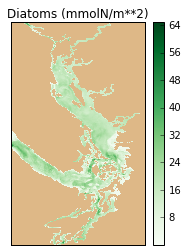

In [4]:
fig, axs = plt.subplots(1,1,figsize=(3,4))
    
conc = grid_g.variables['PHY2']
conc_ma = np.ma.masked_values(conc[time, :, :, :], 0)
    
dep_int = conc_ma*e3t[0,:,:,:]
dep_int_sum = np.sum(dep_int, axis=0)

cmap = plt.get_cmap('Greens')
cmap.set_bad('burlywood')
    
#Surface plot
mesh = axs.pcolormesh(dep_int_sum, cmap=cmap)
cbar = fig.colorbar(mesh)
axs.set_title('Diatoms (mmolN/m**2)'.format(label=conc.long_name.title()), fontsize=12)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)
fig.savefig('DIA.png',dpi=200)

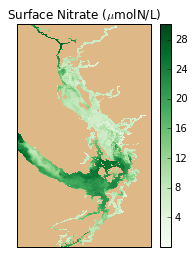

In [6]:
fig, axs = plt.subplots(1,1,figsize=(3,4))

#Prepare surface values
conc=grid_g.variables['NO3']
conc_ma = np.ma.masked_values(conc[time, 0, :, :], 0)
vmin = np.min(conc_ma)
vmax = np.max(conc_ma)

cmap = plt.get_cmap('Greens')
cmap.set_bad('burlywood')
    
#Surface plot
mesh = axs.pcolormesh(conc_ma, cmap=cmap)
cbar = fig.colorbar(mesh)
axs.set_title('Surface Nitrate ($\mu$molN/L)'.format(label=conc.long_name.title()), fontsize=12)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)
fig.savefig('NO3.png',dpi=200)